In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
data = pd.read_csv("../data/raw_feature_table.csv")

# feature scaling: normalization vs standardizaiton

### normalization: force feature into a range of values [-1, 1]
### standardization: force mean and sd to 0 and 1

if features are roughly normal distributions (gaussian), standardize  if not, normalize or if features have very different values


first visualize pre feature scaling

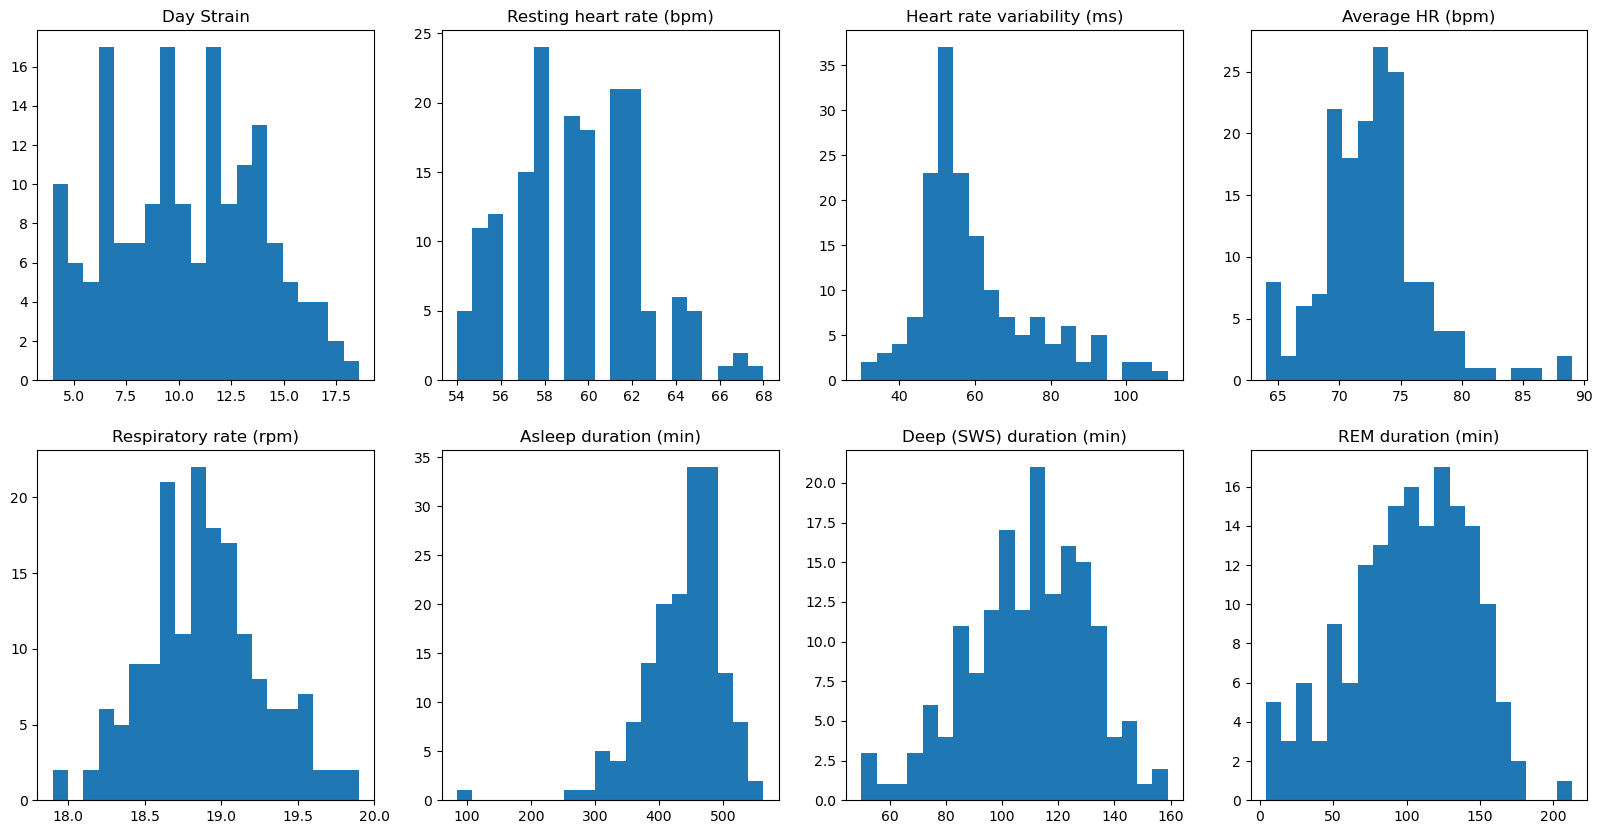

In [38]:
#histograms
fig = plt.figure(figsize=(20,10))

features = [
    "Day Strain",
    "Resting heart rate (bpm)",
    "Heart rate variability (ms)",
    "Average HR (bpm)",
    "Respiratory rate (rpm)",
    "Asleep duration (min)",
    "Deep (SWS) duration (min)",
    "REM duration (min)"
]

for i in range(0, len(features)):
    plt.subplot(2, 4, i + 1)
    plt.hist(data[features[i]], bins=20)
    plt.title(features[i])


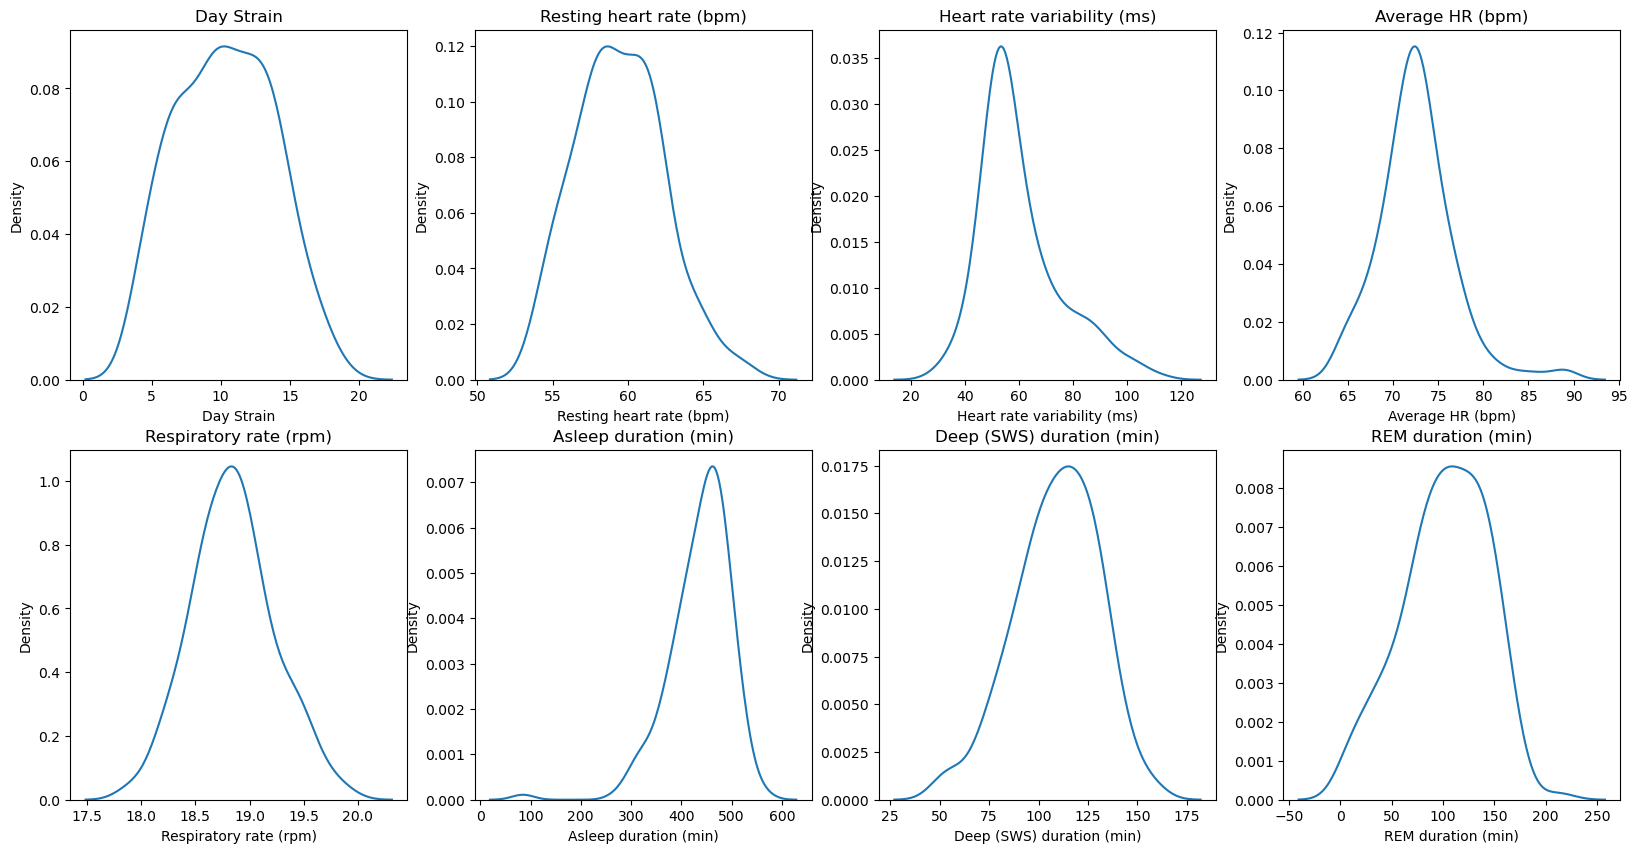

In [39]:
#kde density plots
fig = plt.figure(figsize=(20,10))

for i in range(0, len(features)):
    plt.subplot(2, 4, i + 1)
    sns.kdeplot(data[features[i]])
    plt.title(features[i])

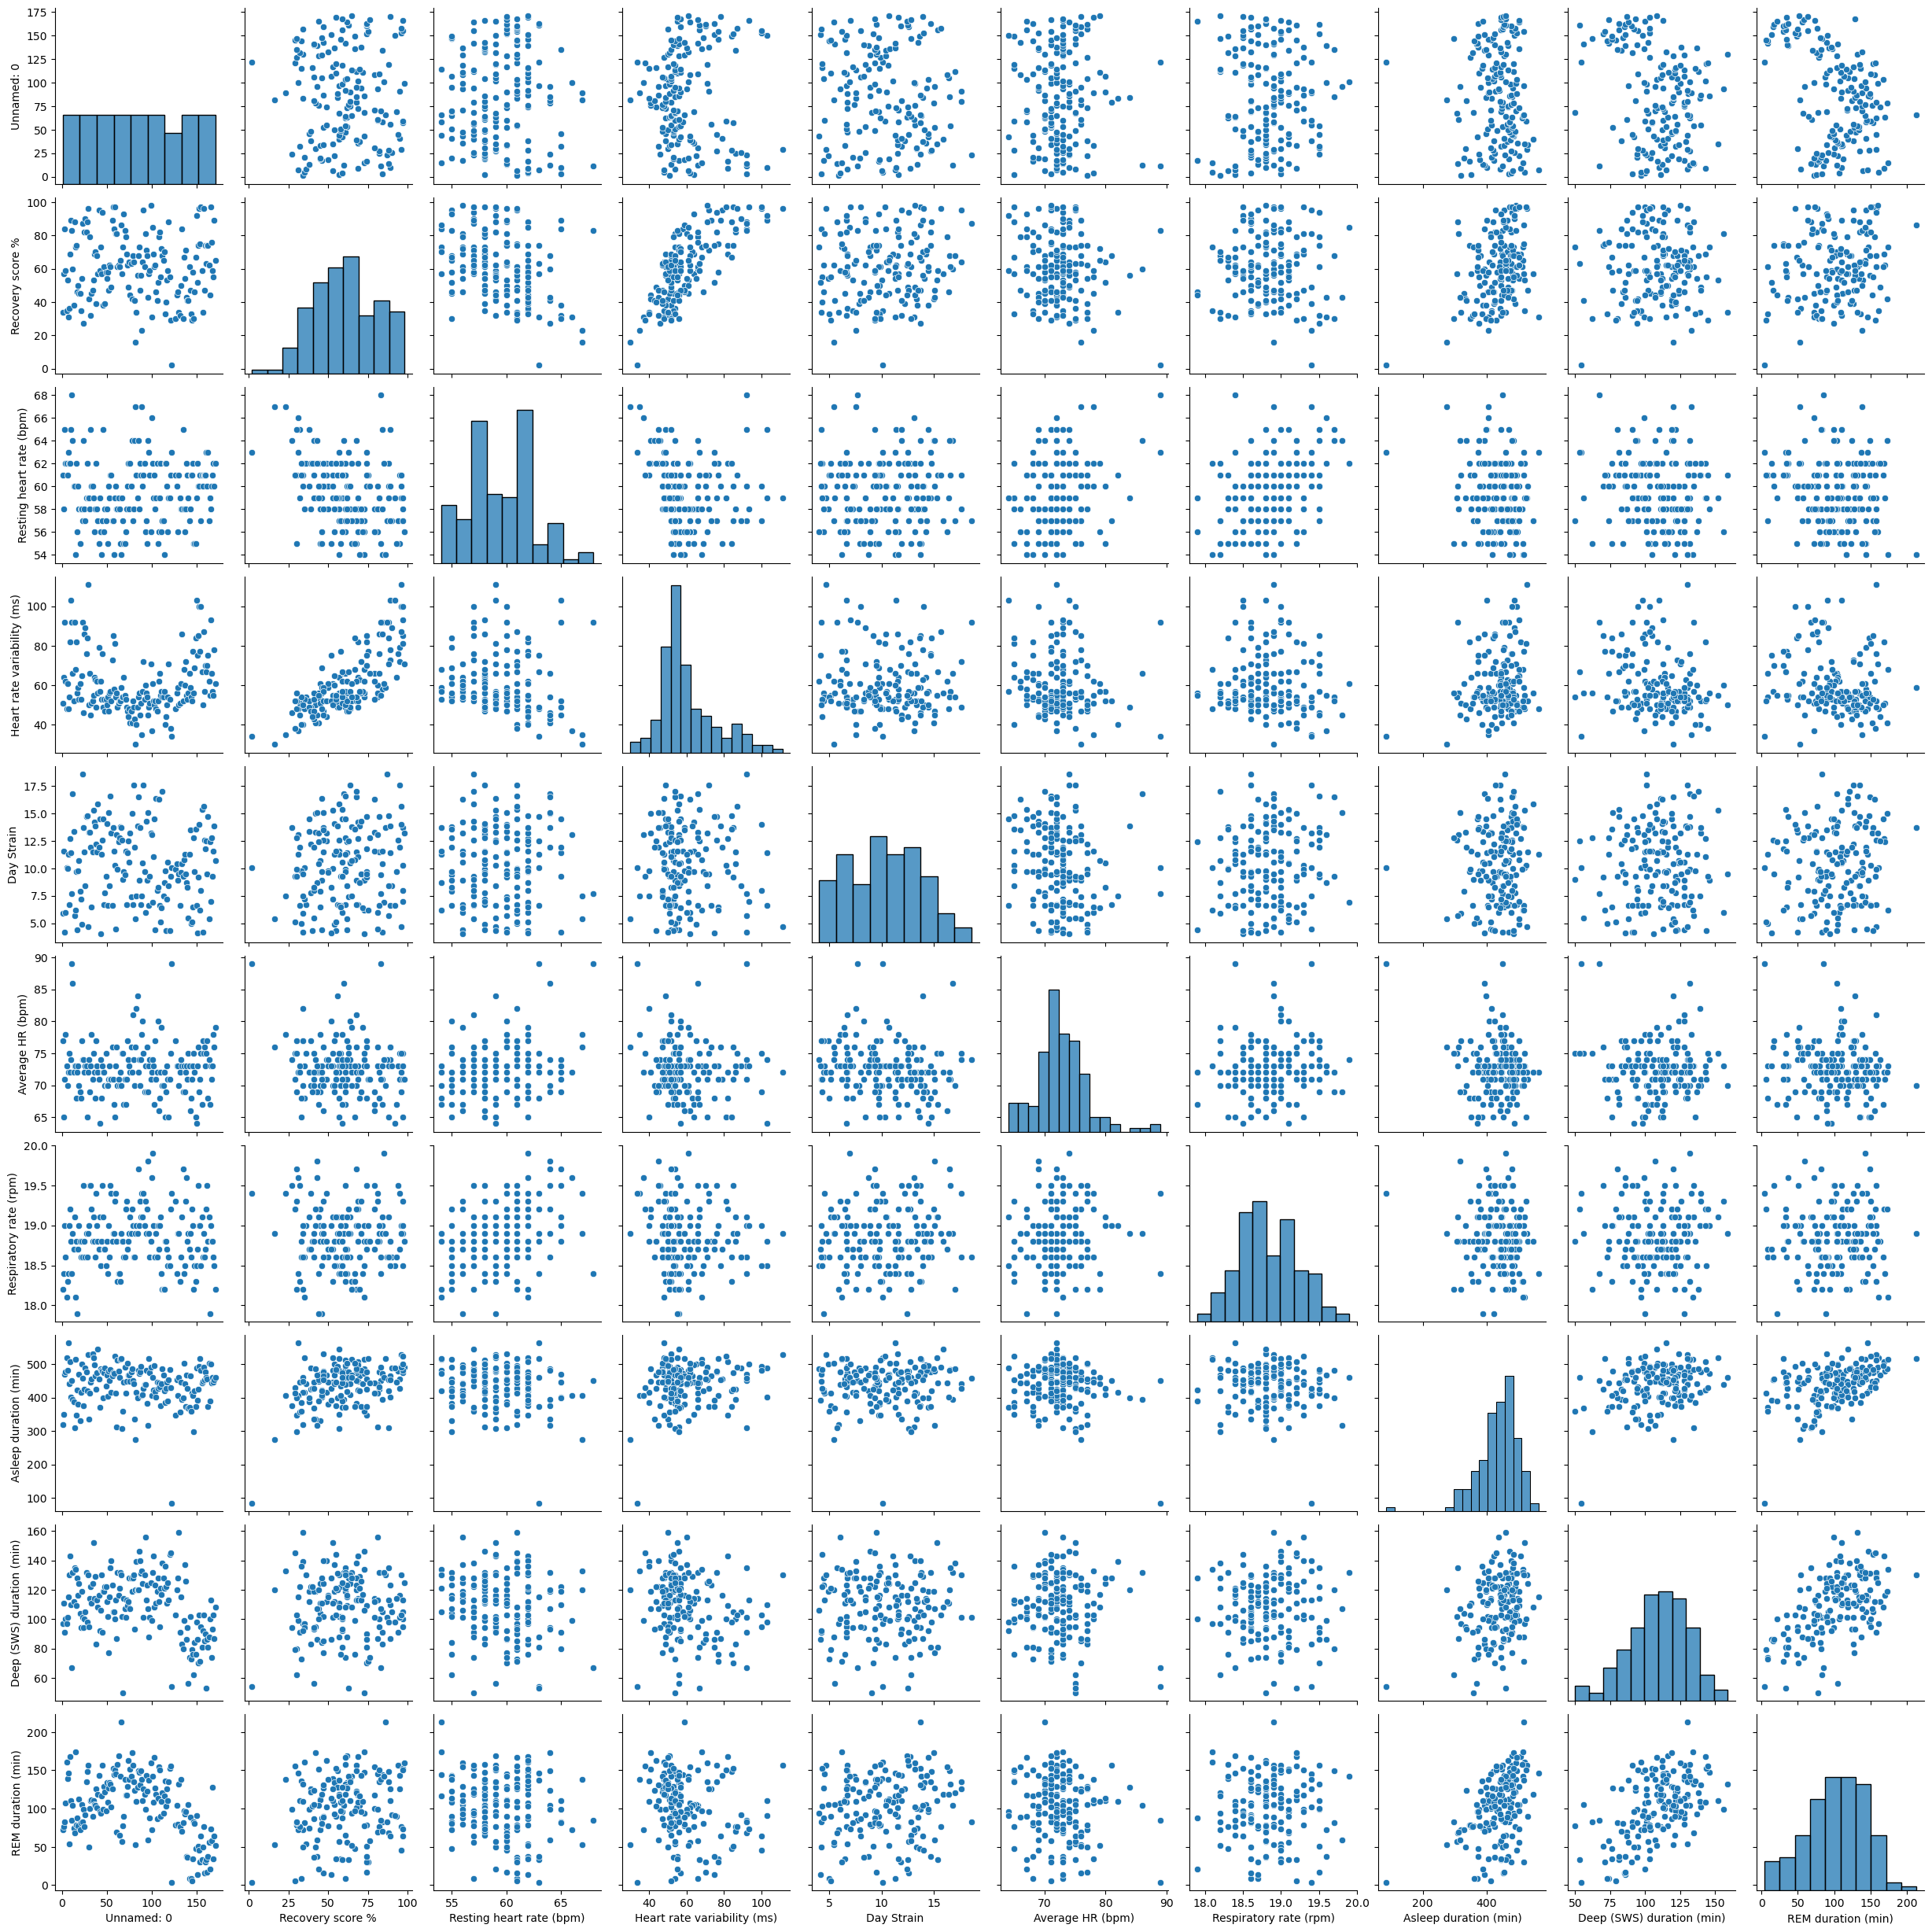

In [40]:
# pairplots for correlation
sns.pairplot(data=data)
#hrv very linearly correlated with recovery score

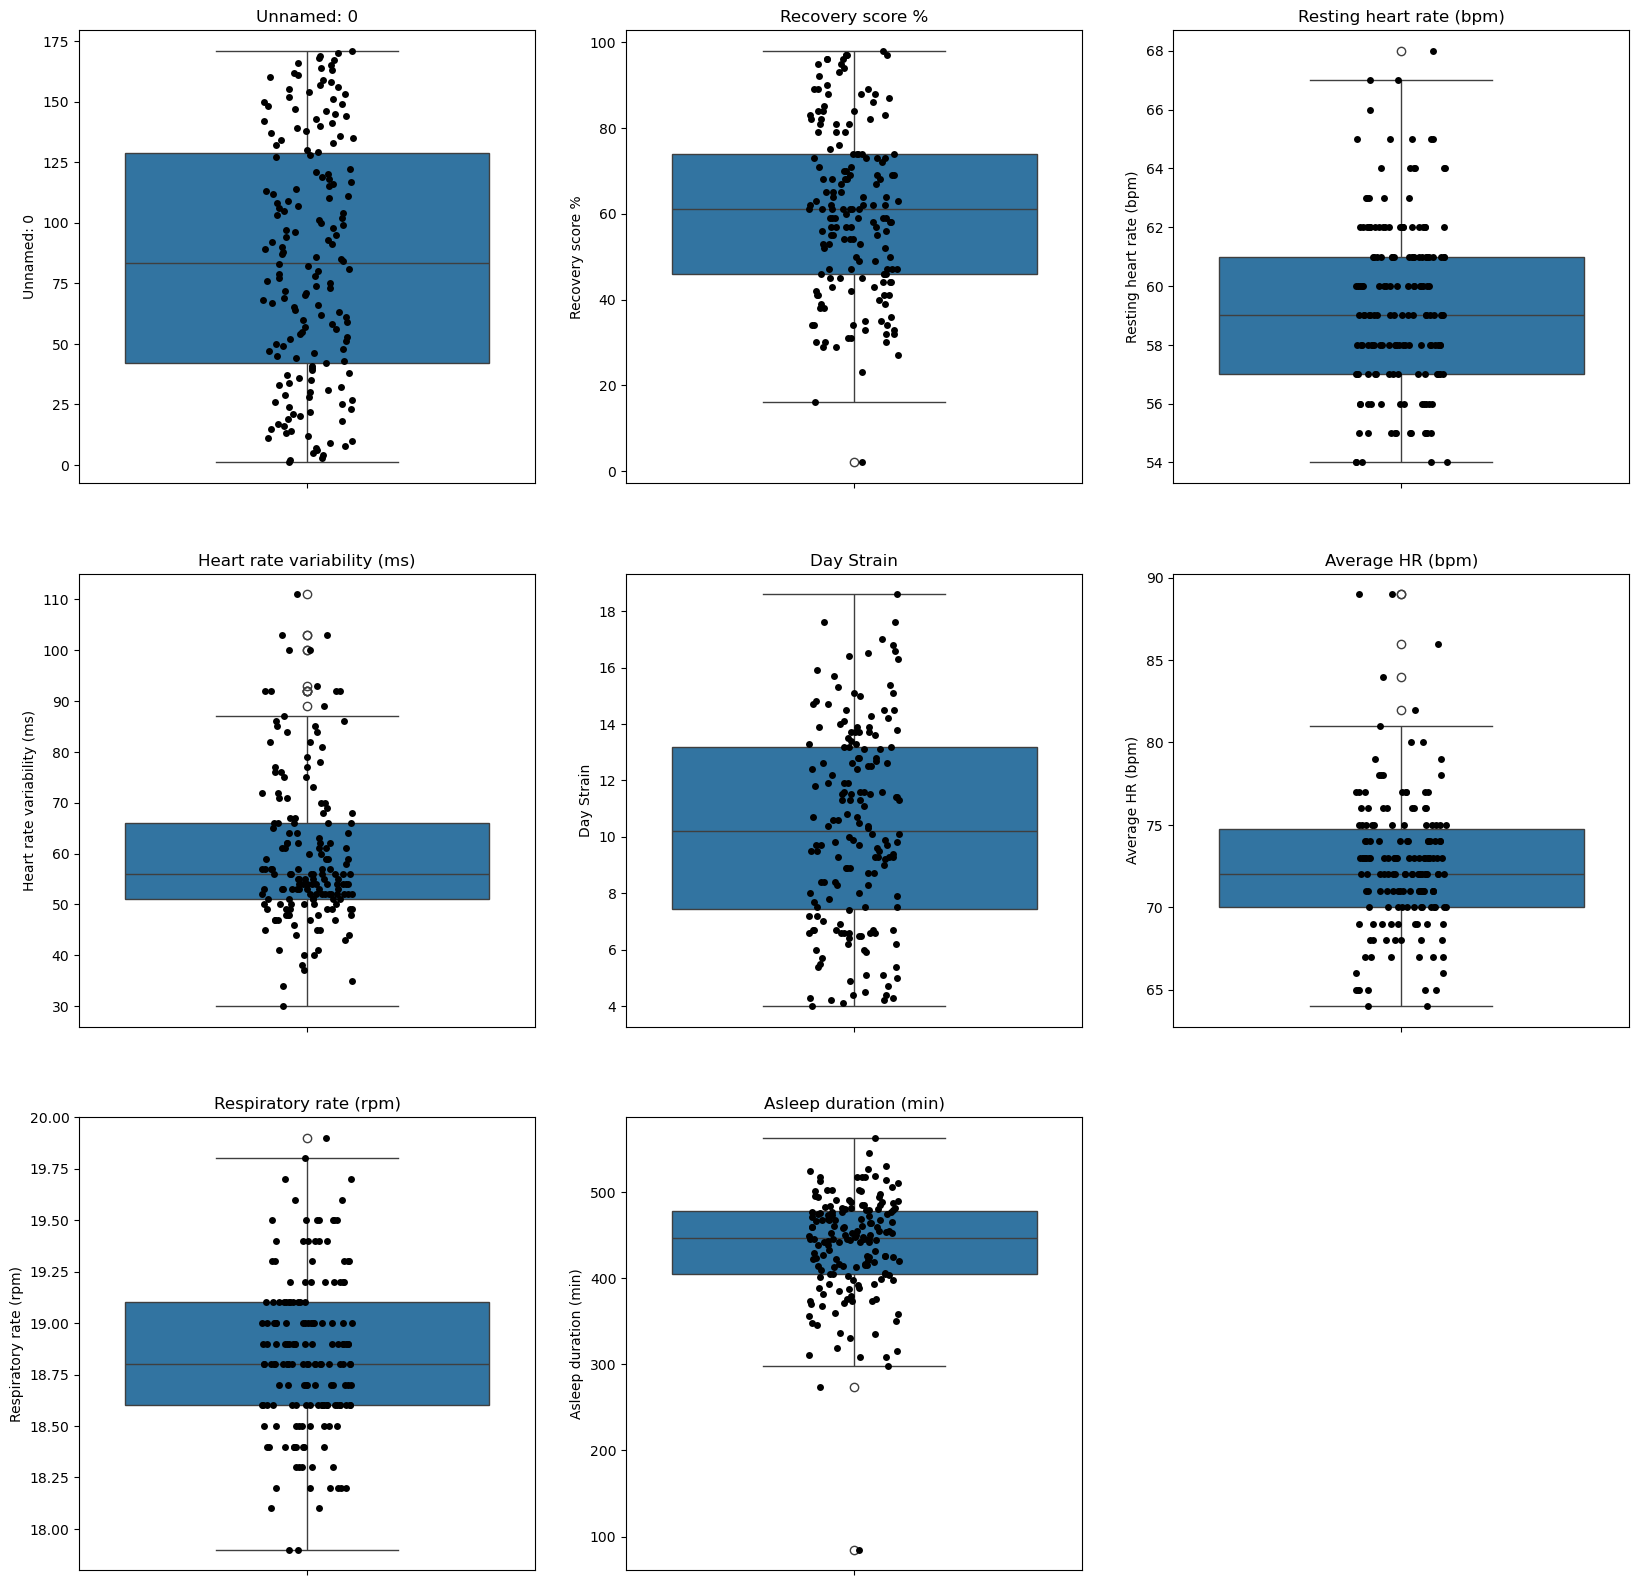

In [41]:
#box plots for outlier / range detection
columns = data.columns.to_list()
fig = plt.figure(figsize=(20, 20))
for i in range(0, len(features)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data[columns[i]])
    sns.stripplot(data[columns[i]], color="black") #overlay raw data
    plt.title(columns[i])

<Axes: ylabel='Asleep duration (min)'>

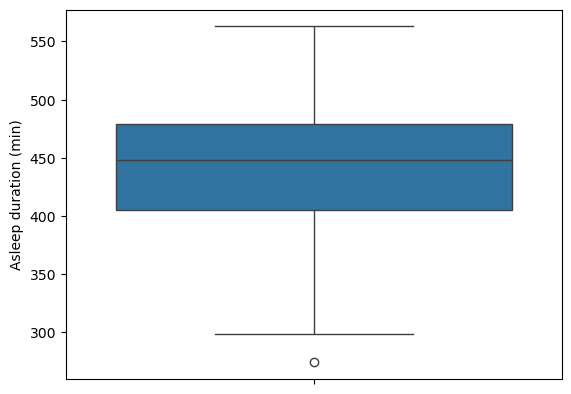

In [42]:
#remove 1 bad outlier for asleep duration that was less than 100 minutes of sleep
data = data[data["Asleep duration (min)"] >= 100]
sns.boxplot(data["Asleep duration (min)"])

In [43]:
#final feature table dimensions
data.shape

(165, 11)

## feature scaling choice: standardization - most features are gaussian as shown in kde and histogram plots


In [44]:
#standardization: set mean to 0 and sd to 1 for all non target features
data.describe() #view mean, sd

,Unnamed: 0,Recovery score %,Resting heart rate (bpm),Heart rate variability (ms),Day Strain,Average HR (bpm),Respiratory rate (rpm),Asleep duration (min),Deep (SWS) duration (min),REM duration (min)
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,84.575758,61.018182,59.436364,60.321212,10.326061,72.472727,18.843636,439.321212,109.503030,102.466667
std,49.821652,19.393069,2.926521,14.868114,3.520981,3.954873,0.381475,54.481927,20.939409,40.910153
min,1.000000,16.000000,54.000000,30.000000,4.000000,64.000000,17.900000,274.000000,50.000000,6.000000
25%,42.000000,46.000000,57.000000,51.000000,7.400000,70.000000,18.600000,405.000000,95.000000,76.000000
50%,83.000000,61.000000,59.000000,56.000000,10.300000,72.000000,18.800000,448.000000,112.000000,105.000000
75%,129.000000,74.000000,61.000000,66.000000,13.200000,74.000000,19.100000,479.000000,124.000000,135.000000
max,171.000000,98.000000,68.000000,111.000000,18.600000,89.000000,19.900000,563.000000,159.000000,213.000000


In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#x, y definition (recovery score is target variable y)

features = [
    "Day Strain",
    "Resting heart rate (bpm)",
    "Heart rate variability (ms)",
    "Average HR (bpm)",
    "Respiratory rate (rpm)",
    "Asleep duration (min)",
    "Deep (SWS) duration (min)",
    "REM duration (min)"
]
x, y = data[features], data["Recovery score %"]
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.26088004,  0.53592524, -0.62883476, ..., -2.21518391,
        -0.5989229 , -0.74698844],
       [ 0.36291522, -0.49230342,  0.24818121, ..., -1.64445577,
         0.07170817, -0.64891556],
       [-1.74516986,  1.90689679,  2.1371387 , ...,  0.54640385,
        -0.88633622, -0.47728802],
       ...,
       [ 0.36291522,  0.87866813, -0.3589837 , ...,  0.10454981,
        -0.31150959, -1.67868081],
       [ 1.01813085,  0.19318235,  1.19265995, ...,  0.25183449,
        -1.0779451 , -0.9431342 ],
       [ 0.10652649,  0.87866813,  0.04579291, ...,  0.38070858,
        -0.07199849, -1.23735284]])

In [46]:
scaled_df = pd.DataFrame(x_scaled, columns=features, index=data.index)
#add target y back
scaled_df = pd.concat([scaled_df, y, data["Date"]], axis=1)
scaled_df

,Day Strain,Resting heart rate (bpm),Heart rate variability (ms),Average HR (bpm),Respiratory rate (rpm),Asleep duration (min),Deep (SWS) duration (min),REM duration (min),Recovery score %,Date
0,-1.260880,0.535925,-0.628835,1.148218,-1.692366,-2.215184,-0.598923,-0.746988,34.0,2025-07-16
1,0.362915,-0.492303,0.248181,-1.895251,-1.166490,-1.644456,0.071708,-0.648916,57.0,2025-07-16
2,-1.745170,1.906897,2.137139,-0.373517,0.411140,0.546404,-0.886336,-0.477288,84.0,2025-07-15
3,-1.232392,0.878668,0.113256,1.401840,-0.640613,0.693689,-0.455216,0.111149,59.0,2025-07-14
4,-0.064399,0.878668,-0.831223,0.133728,-1.955305,1.466933,-0.598923,1.435133,35.0,2025-07-13
...,...,...,...,...,...,...,...,...,...,...
161,0.704767,0.193182,0.383107,-0.373517,-0.114737,0.086139,-1.700674,-1.090244,76.0,2025-01-30
162,-0.292300,0.535925,-0.224058,0.133728,-0.114737,0.380709,-0.790532,0.626032,59.0,2025-01-29
163,0.362915,0.878668,-0.358984,1.401840,-0.640613,0.104550,-0.311510,-1.678681,55.0,2025-01-28
164,1.018131,0.193182,1.192660,0.894595,-0.903552,0.251834,-1.077945,-0.943134,89.0,2025-01-27


In [47]:
scaled_df.describe() #all features means 0 and sd 1 !!

,Day Strain,Resting heart rate (bpm),Heart rate variability (ms),Average HR (bpm),Respiratory rate (rpm),Asleep duration (min),Deep (SWS) duration (min),REM duration (min),Recovery score %
count,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,165.000000
mean,-5.167584e-16,-3.983346e-16,4.575465e-17,9.124015e-16,-1.507212e-16,1.291896e-16,1.722528e-16,-4.306320e-17,61.018182
std,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,19.393069
min,-1.802145e+00,-1.863275e+00,-2.045553e+00,-2.148873e+00,-2.481181e+00,-3.043660e+00,-2.850327e+00,-2.365191e+00,16.000000
25%,-8.335655e-01,-8.350463e-01,-6.288348e-01,-6.271389e-01,-6.406133e-01,-6.318736e-01,-6.947273e-01,-6.489156e-01,46.000000
50%,-7.424051e-03,-1.495605e-01,-2.915209e-01,-1.198942e-01,-1.147367e-01,1.597816e-01,1.196104e-01,6.211282e-02,61.000000
75%,8.187174e-01,5.359252e-01,3.831067e-01,3.873505e-01,6.740781e-01,7.305097e-01,6.944370e-01,7.976594e-01,74.000000
max,2.357050e+00,2.935125e+00,3.418931e+00,4.191686e+00,2.777584e+00,2.276999e+00,2.371015e+00,2.710081e+00,98.000000


# feature scaling via standardization complete

### re-visualize data

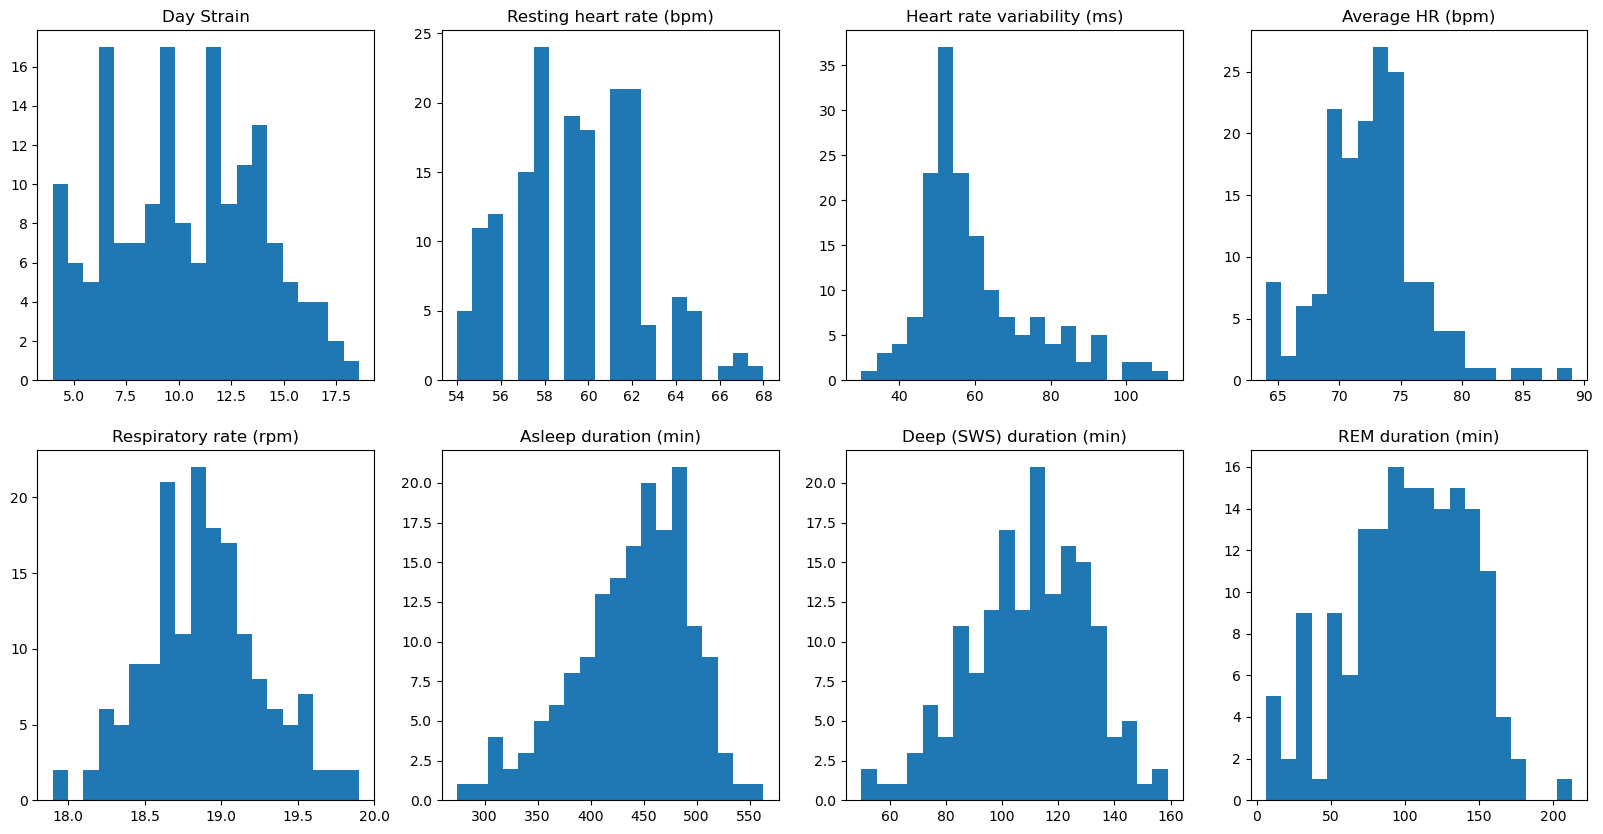

In [48]:
#histograms
fig = plt.figure(figsize=(20,10))

features = [
    "Day Strain",
    "Resting heart rate (bpm)",
    "Heart rate variability (ms)",
    "Average HR (bpm)",
    "Respiratory rate (rpm)",
    "Asleep duration (min)",
    "Deep (SWS) duration (min)",
    "REM duration (min)"
]

for i in range(0, len(features)):
    plt.subplot(2, 4, i + 1)
    plt.hist(data[features[i]], bins=20)
    plt.title(features[i])

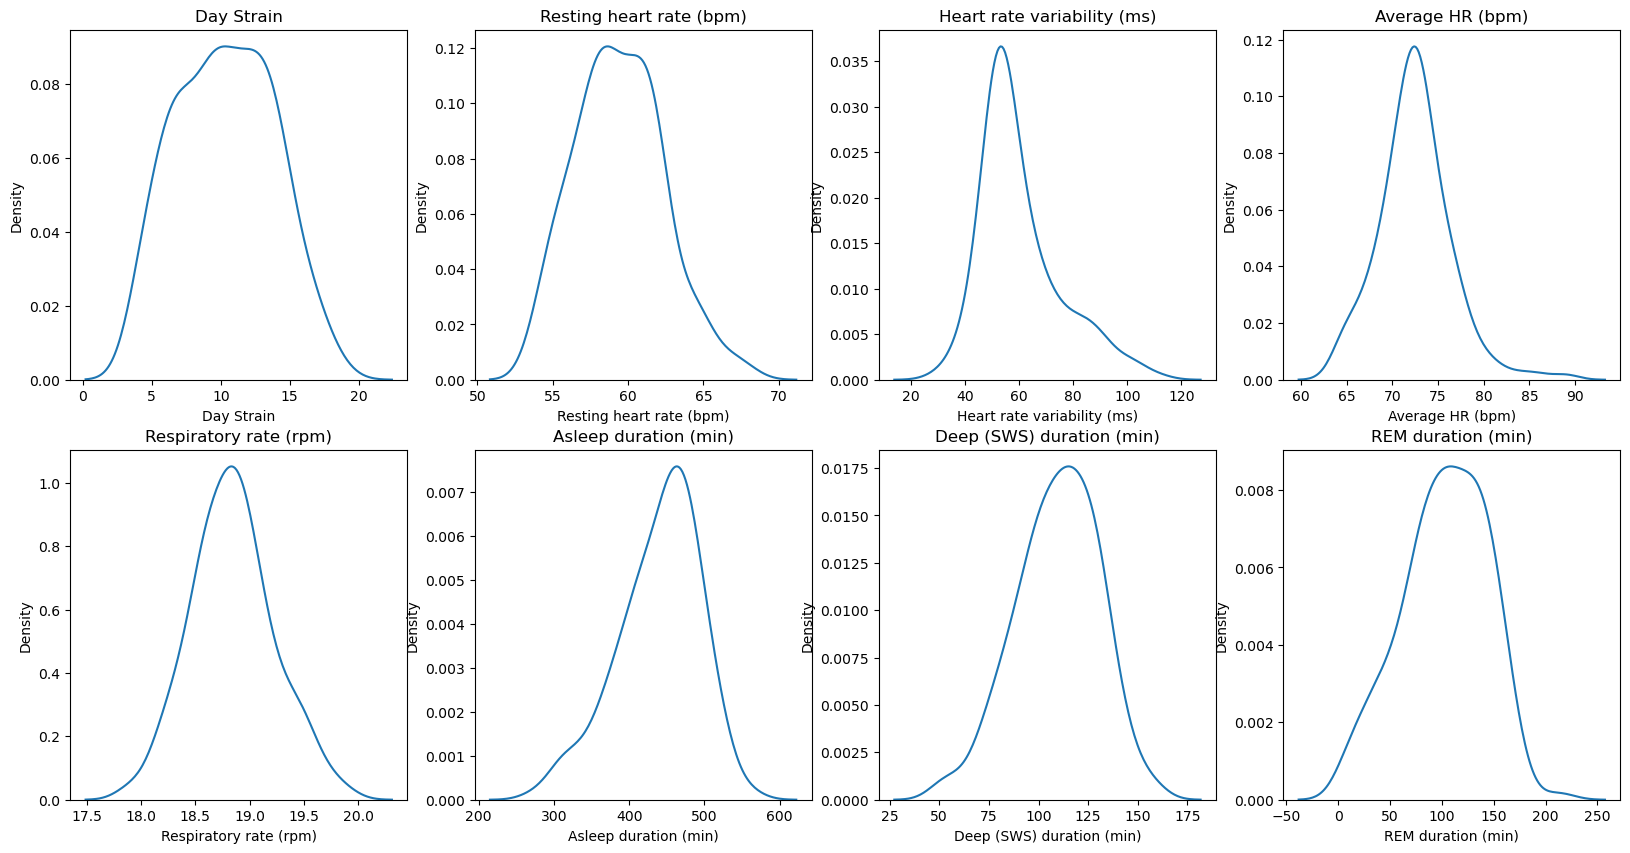

In [49]:
#kde density plots
fig = plt.figure(figsize=(20,10))

for i in range(0, len(features)):
    plt.subplot(2, 4, i + 1)
    sns.kdeplot(data[features[i]])
    plt.title(features[i])

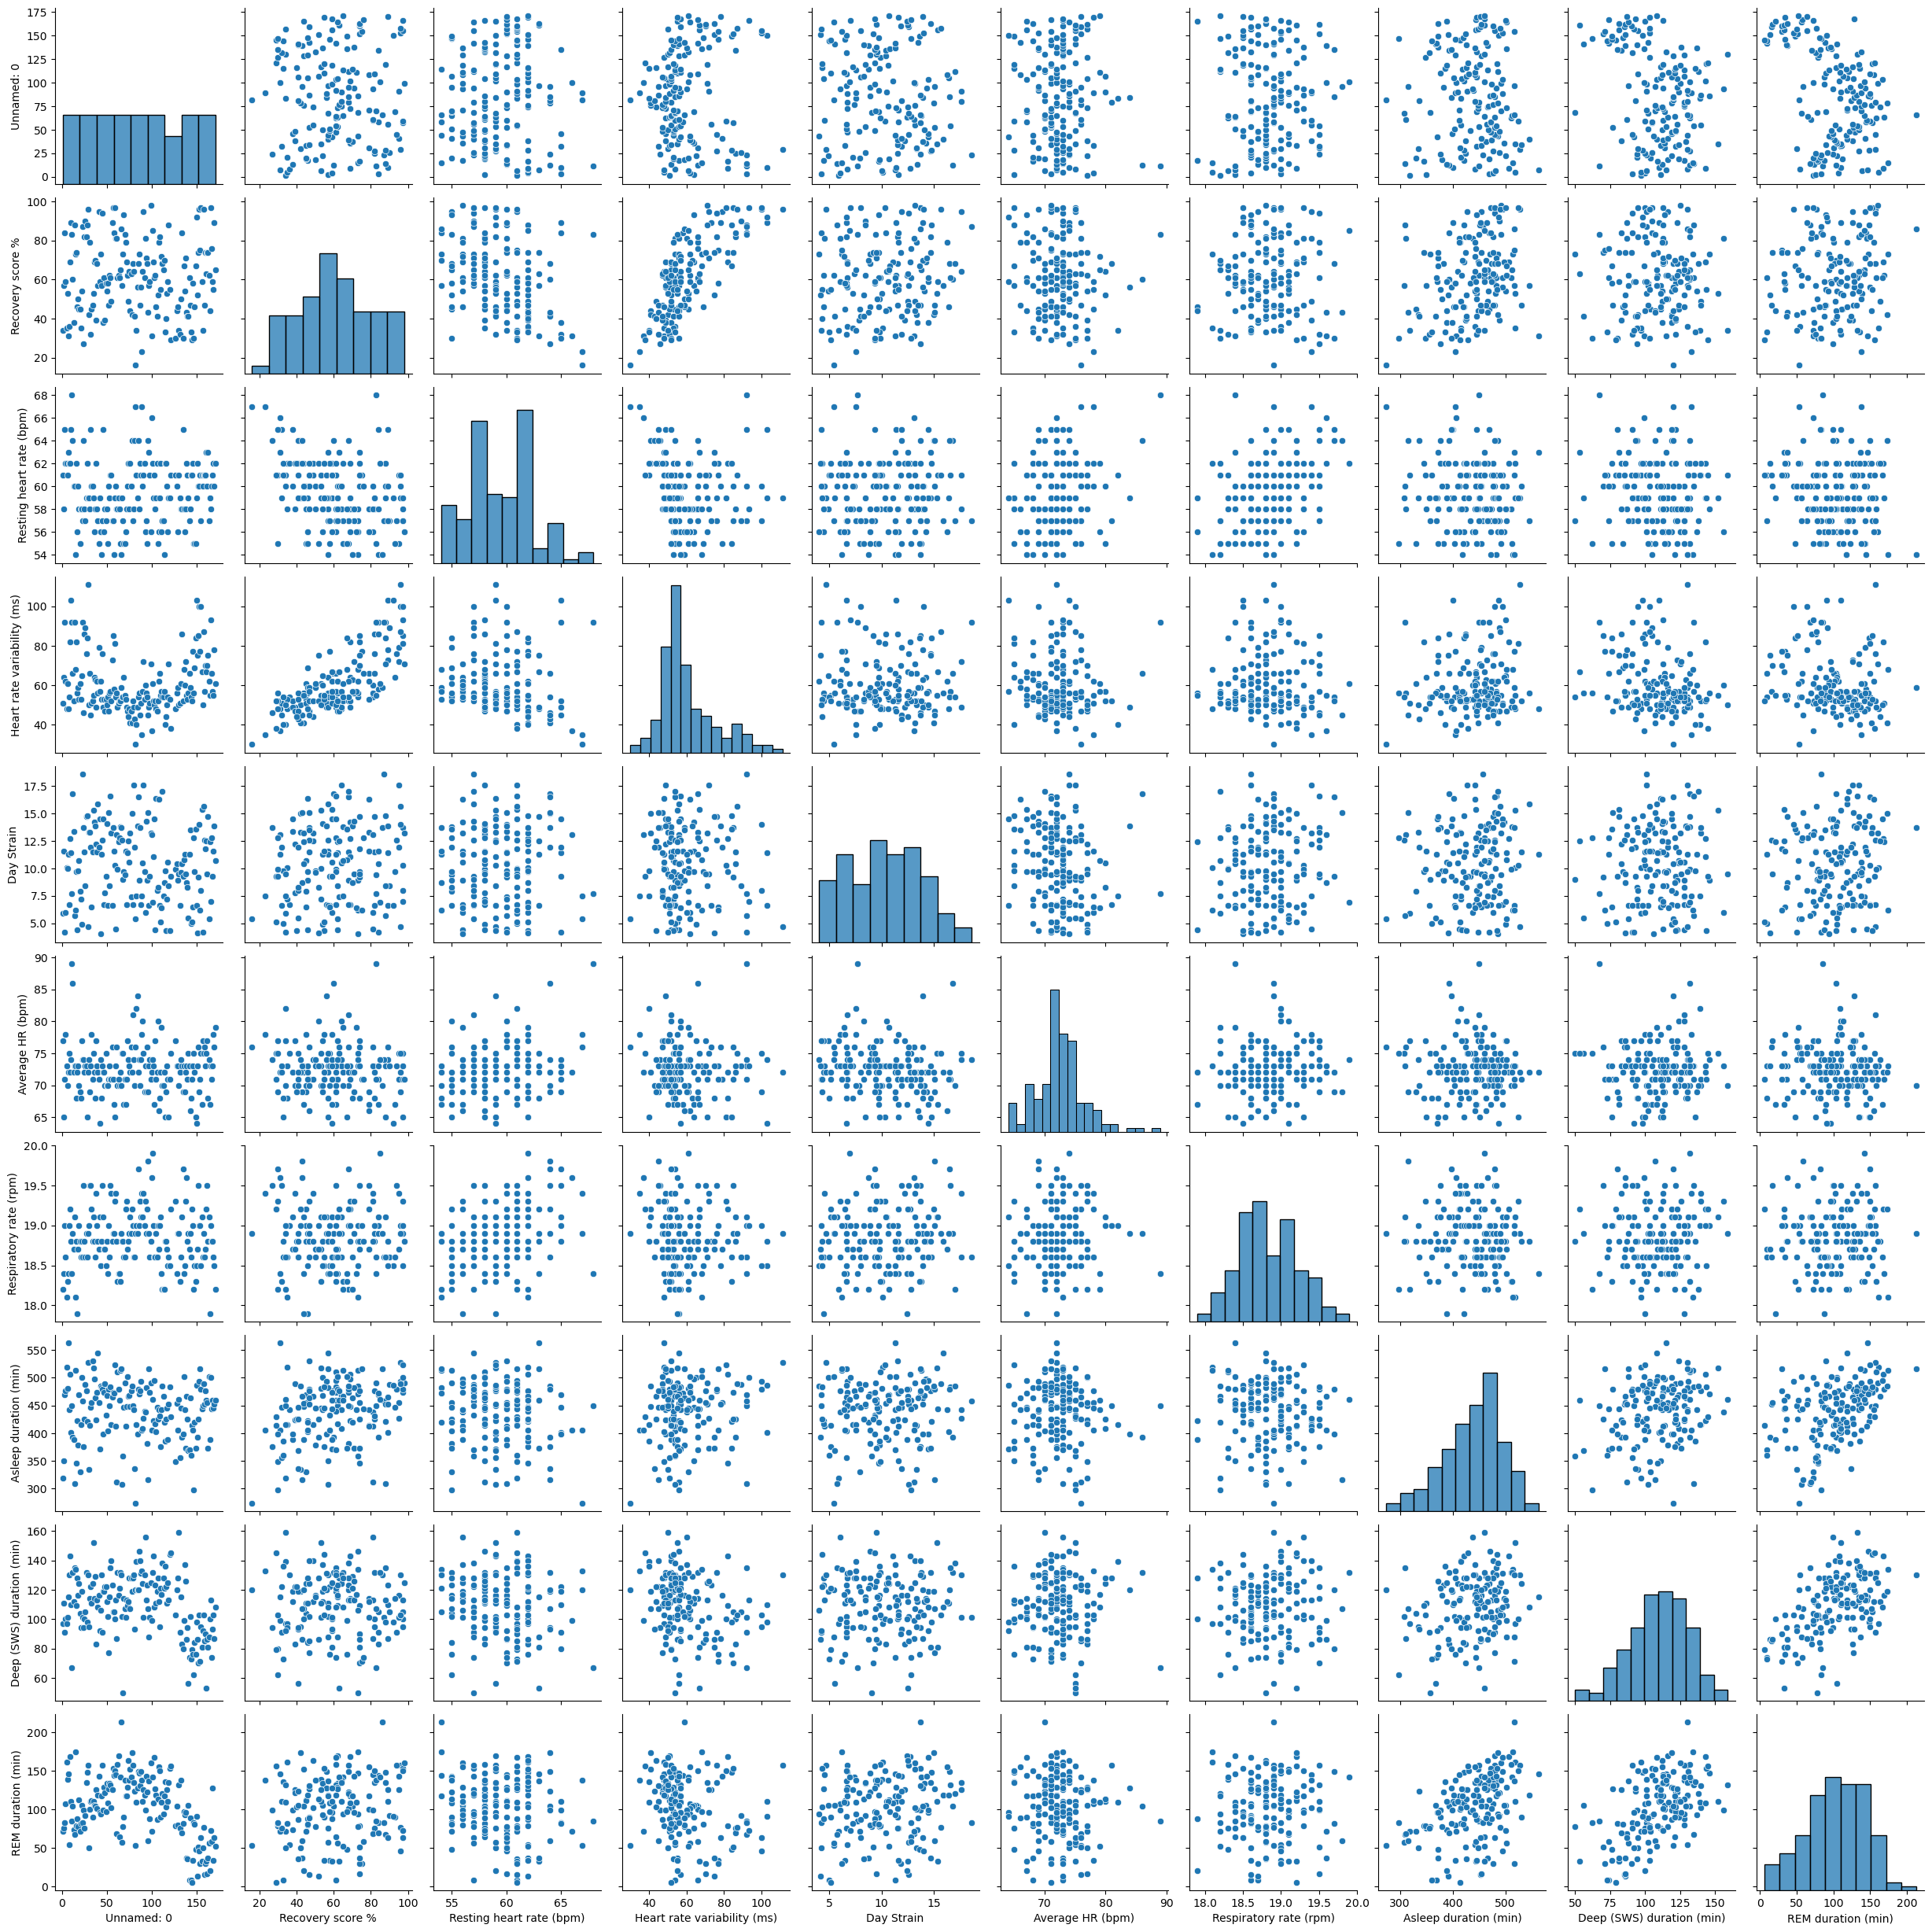

In [50]:
# pairplots for correlation
sns.pairplot(data=data)
#hrv very linearly correlated with recovery score

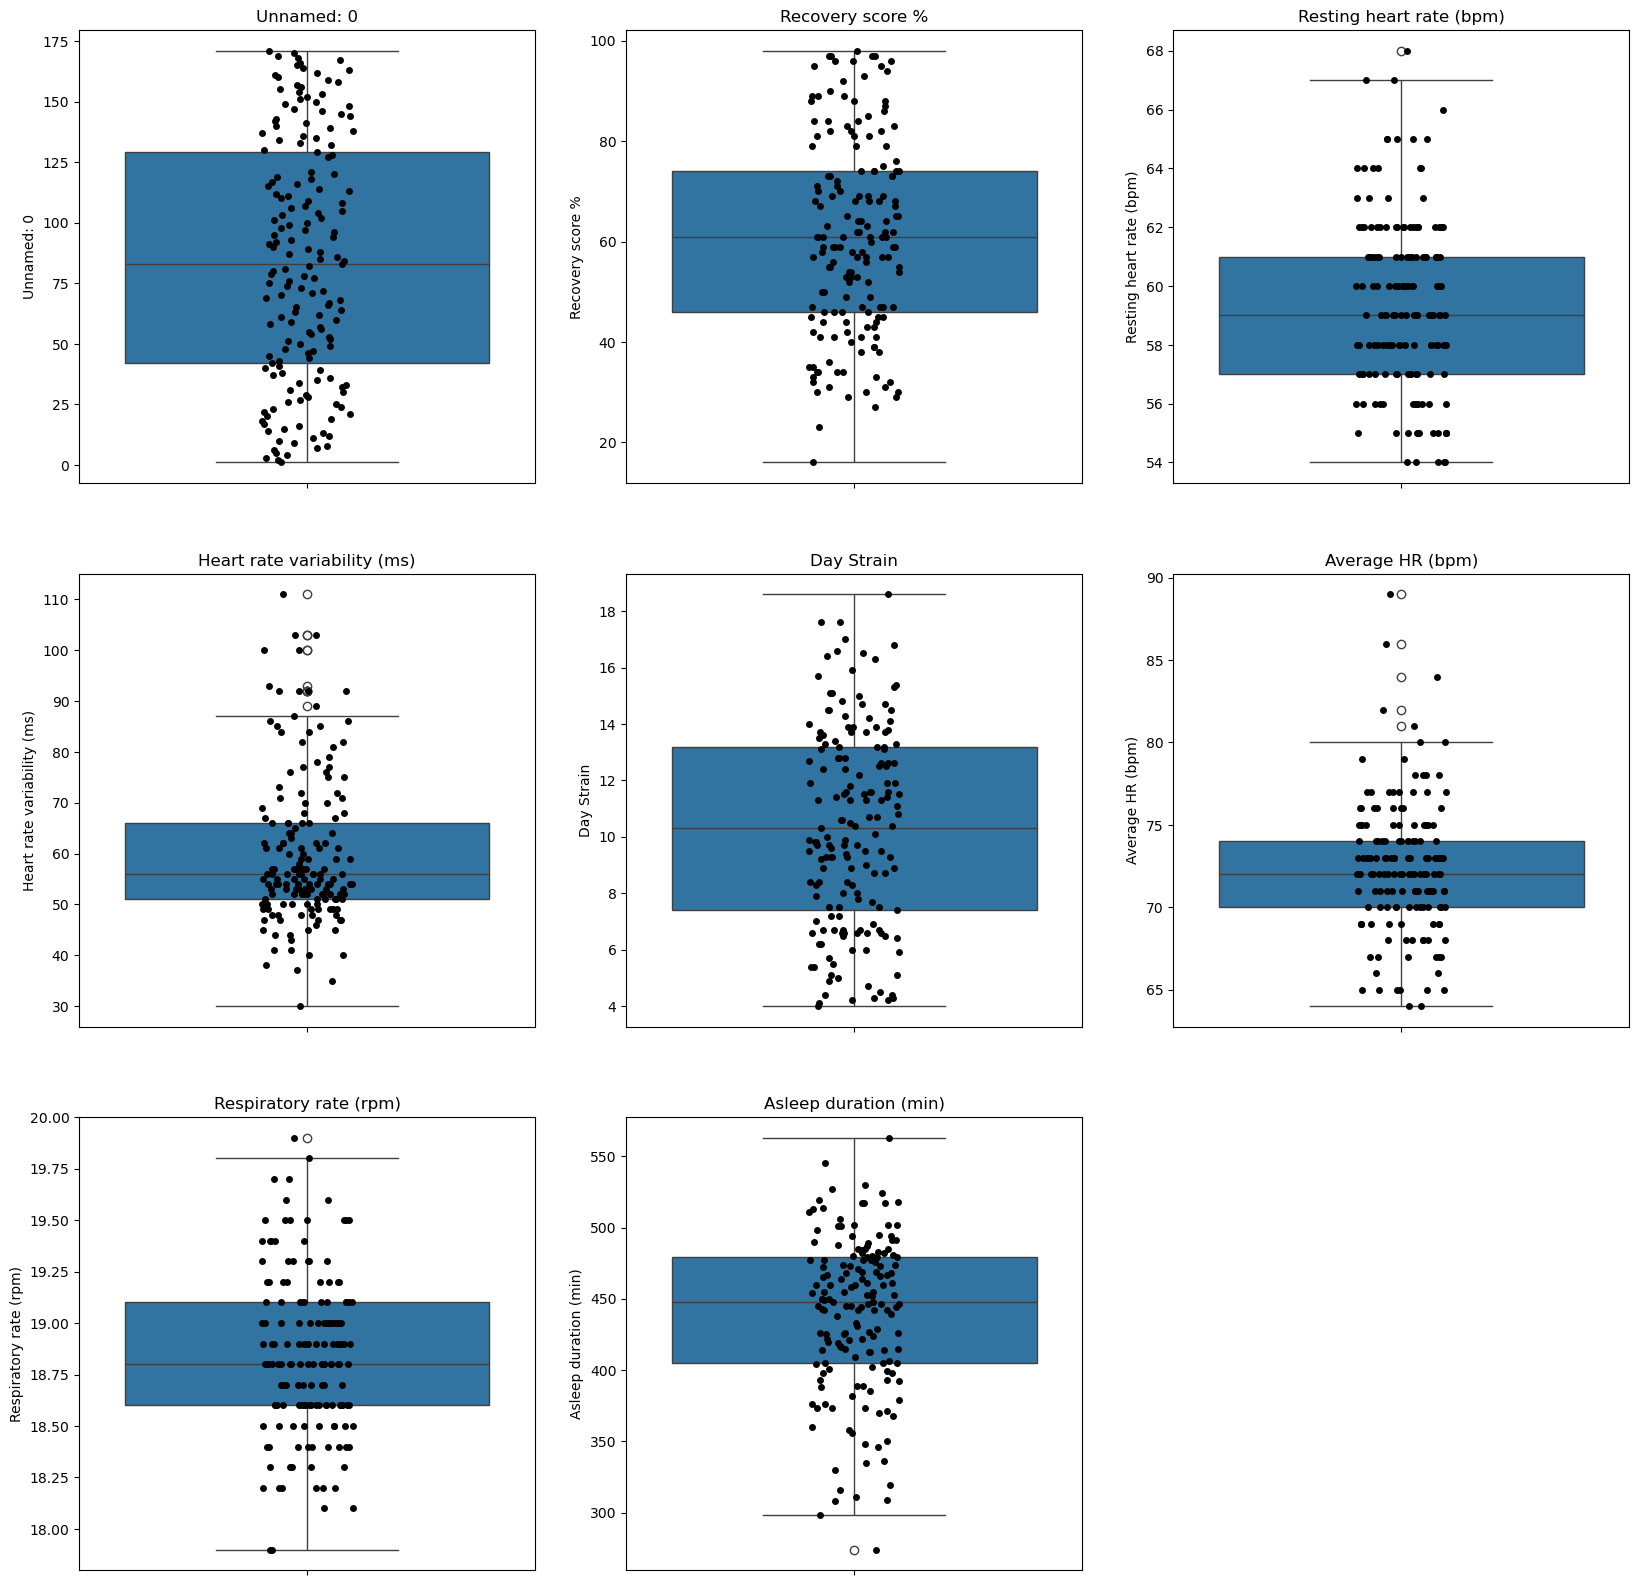

In [51]:
#box plots for outlier / range detection
columns = data.columns.to_list()
fig = plt.figure(figsize=(20, 20))
for i in range(0, len(features)):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data[columns[i]])
    sns.stripplot(data[columns[i]], color="black") #overlay raw data
    plt.title(columns[i])

In [53]:
#write out final standardized feature table
scaled_df.to_csv("../data/feature_table.csv")